In [15]:
import pandas as pd
import numpy as np
import simple_linear_regression as slr
import matplotlib.pyplot as plt

In [16]:
# Load the CSV file
data = pd.read_csv('data/hsb2.csv')

# Split into features (x) and target (y)
x_raw = data["math"].values
y_train = data["science"].values

# Standardize features (x)
x_mean = np.mean(x_raw)
x_std  = np.std(x_raw)
x_train_norm = (x_raw - x_mean) / x_std

In [17]:
# hyper-parameters
w_init = 0.0
b_init = 0.0
alpha   = 0.01
iterations = 1000

# train the model
w_final, b_final, J_hist, p_history = slr.gradient_descent(
    x_train_norm, y_train,
    alpha=alpha,
    num_iters=iterations,
    w_in=w_init,
    b_in=b_init,
    compute_gradient=slr.compute_gradient
)

print(f"(w, b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

# De-standardize the model
w_raw_final = w_final / x_std
b_raw_final = b_final - w_final * (x_mean / x_std)

print(f"\nDe-standardized model")
print(f"(w, b) found by gradient descent: ({w_raw_final:8.4f}, {b_raw_final:8.4f})")

(w, b) found by gradient descent: (  6.2289,  51.8478)

De-standardized model
(w, b) found by gradient descent: (  0.6666,  16.7572)


In [18]:
# prediction requires standardizing of input as training was done on standardized data.
def predict(math_score_raw):
    z = (math_score_raw - x_mean) / x_std
    return w_final * z + b_final

In [19]:
# How many hours did you study?
score = 40

In [20]:
print(f"A student who scores {score} in Math, is predicted to score a {predict(score):.0f} in Science.")

A student who scores 40 in Math, is predicted to score a 43 in Science.


Text(0.5, 1.0, 'Convergence')

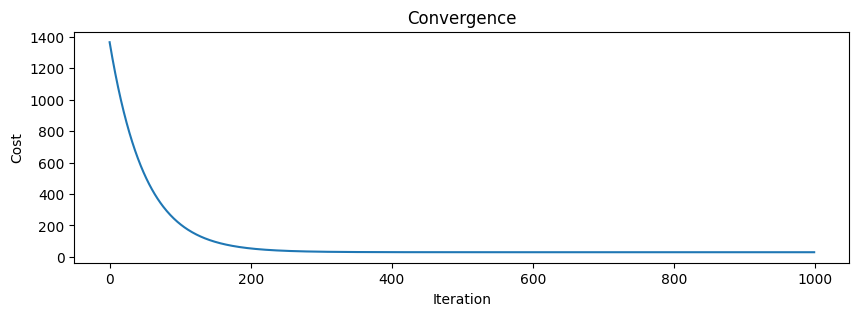

In [21]:
plt.figure(figsize=(10, 3))
plt.plot(J_hist)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Convergence")

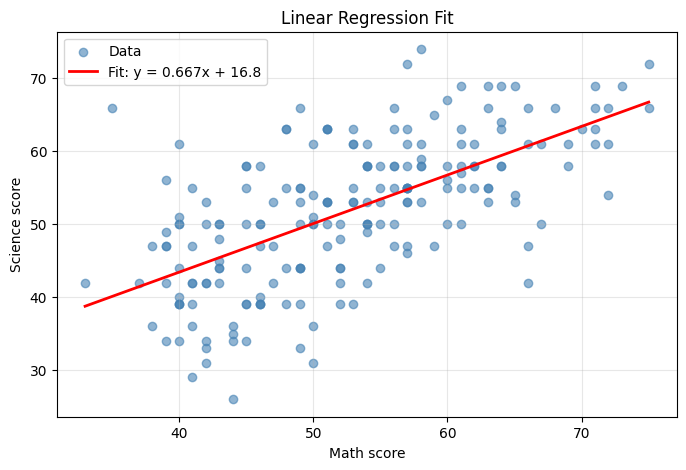

In [22]:
x_raw_line = np.linspace(x_raw.min(), x_raw.max(), 200)
y_raw_line = w_raw_final * x_raw_line + b_raw_final

plt.figure(figsize=(8,5))

plt.scatter(x_raw, y_train, c='steelblue', alpha=0.6, label='Data')

plt.plot(x_raw_line, y_raw_line, 'r-', lw=2,
         label=f'Fit: y = {w_raw_final:.3f}x + {b_raw_final:.1f}')

plt.xlabel('Math score')
plt.ylabel('Science score')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

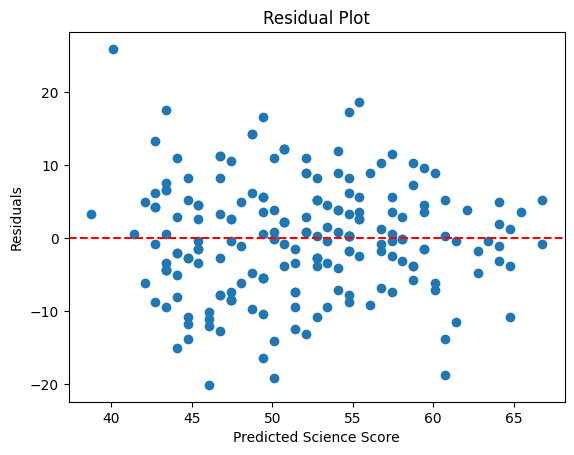

In [23]:
y_pred = predict(x_raw)
residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Science Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [26]:
# Calculate R² for our custom model
def calculate_r2(y_true, y_pred):
    """Calculate R-squared (coefficient of determination)"""
    ss_res = np.sum((y_true - y_pred) ** 2)  # Sum of squares of residuals
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Total sum of squares
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Get predictions from our model
y_pred_custom = predict(x_raw)

# Calculate R² for our custom model
r2_custom = calculate_r2(y_train, y_pred_custom)

y_pred_raw = w_raw_final * x_raw + b_raw_final
mse = np.mean((y_train - y_pred_raw) ** 2)
rmse = np.sqrt(mse)

print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}  (≈ ±{rmse:.1f} Science points)")

MSE  = 58.73
RMSE = 7.66  (≈ ±7.7 Science points)


In [25]:
print("Our Model (Raw Units)")
print(f"w (slope)     = {w_raw_final:.6f}")
print(f"b (intercept) = {b_raw_final:.6f}")
print(f"R²            = {r2_custom:.6f}")
print()

Our Model (Raw Units)
w (slope)     = 0.666551
b (intercept) = 16.757171
R²            = 0.397824



## Sklearn Comparison

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sk_model_norm = LinearRegression()
sk_model_norm.fit(x_raw.reshape(-1, 1), y_train)
y_pred_sk_norm = sk_model_norm.predict(x_raw.reshape(-1, 1))
r2_sk_norm = r2_score(y_train, y_pred_sk_norm)

print("sklearn results: \n")
print(f"w (slope)   = {sk_model_norm.coef_[0]:.6f}")
print(f"b (intercept) = {sk_model_norm.intercept_:.6f}")
print(f"R²          = {r2_sk_norm:.6f}")
print()

sklearn results: 

w (slope)   = 0.666580
b (intercept) = 16.757895
R²          = 0.397824

